In [1]:
# Once Upon a time, there was a titanic dataset...

In [5]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Dataset
dataset = pd.read_csv("train.csv")

In [6]:
# taking a look into the dataset...
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Brief Description Of The Variables
#### Survived: 1 for survived and 0 for didn't survive
#### Pclass (ticket class): 1 for 1st, 2 for 2nd, 3 for 3rd class
#### sibsp: Number of siblings or spouses on board
#### parch: number of parents / children aboard the Titanic
#### Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

In [7]:
# a look at its structure...
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# a closer look into its guts... (SUMMARY STATISTICS)
dataset = dataset.drop('PassengerId', axis=1)
dataset.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
# BIVARIATE HELPER FUNCTIONS
def bivariate_hist_box(dataframe, target_var, num_var):
    dummy_target_var = dataframe[target_var]
    dummy_target_var = dummy_target_var.replace({
        0: "Didn't survive",
        1: "Survived"
    })
    # Plot layout
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    # Histogram
    sns.histplot(data=dataframe, x=num_var, hue=dummy_target_var, kde=True, ax=axes[0])
    axes[0].set_title(f"Distribution Of {num_var}")
    # BoxPlot
    sns.boxplot(data=dataframe, y=num_var, x=dummy_target_var, hue=dummy_target_var, ax=axes[1])
    axes[1].set_title(f"Boxplot of Survival Against {num_var}")
    plt.show()

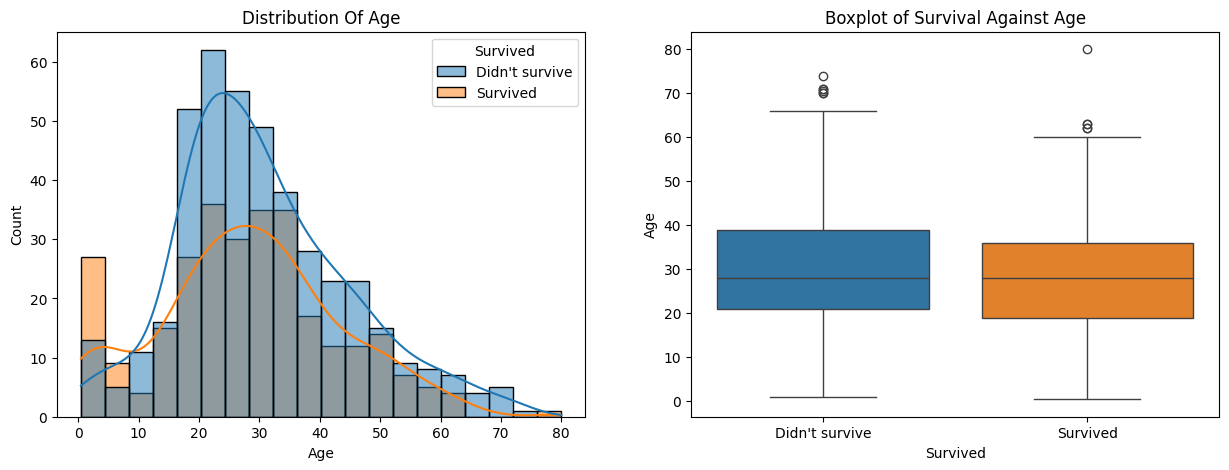

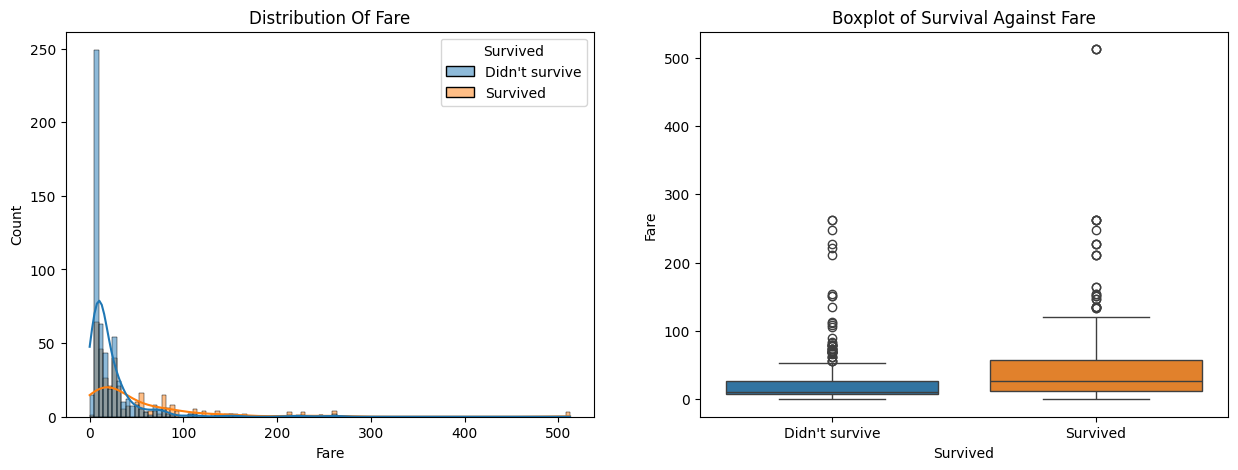

In [44]:
# Bivariate For Age
bivariate_hist_box(dataframe=dataset, target_var="Survived", num_var="Age")
bivariate_hist_box(dataframe=dataset, target_var="Survived", num_var="Fare")

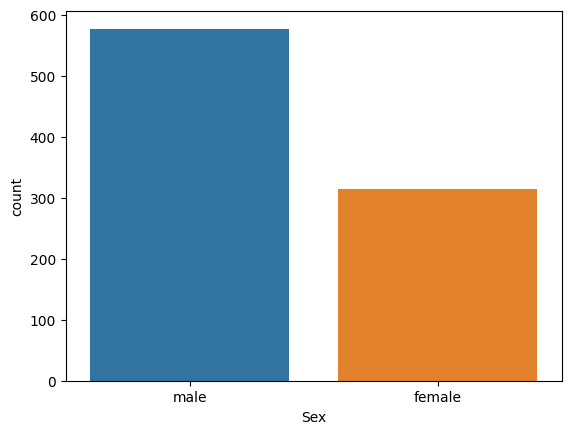

In [37]:
# Apparently there where...
sns.countplot(
    data=dataset,
    x='Sex',
    hue='Sex'
)
plt.show()

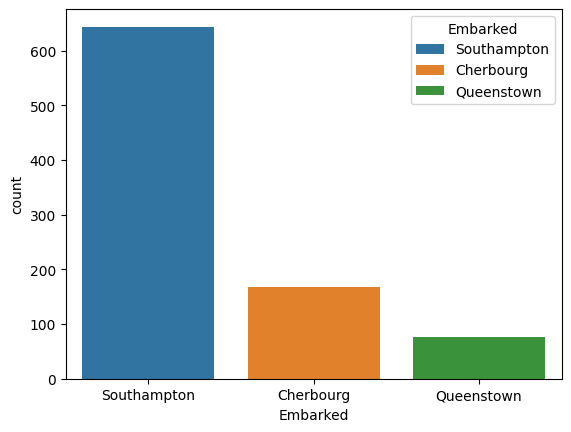

In [11]:
# So and most passengers where from...
dataset['Embarked'] = dataset['Embarked'].replace({
    'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'
})
sns.countplot(
    data=dataset,
    x='Embarked',
    hue='Embarked'
)
plt.show()

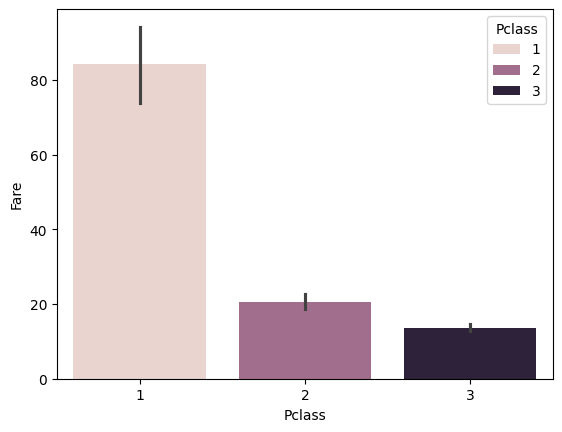

In [26]:
# And so the rich guys probably paid around...
sns.barplot(
    data=dataset,
    x='Pclass',
    y='Fare',
    hue='Pclass'
)
plt.show()

In [57]:
# The passengers in 1st class paid...
avg_fares = dataset.groupby('Pclass')['Fare'].mean()
print(f'{((avg_fares[1] - avg_fares[2]) / (avg_fares[2])):.2f} times more fare than the 2nd class')

3.07 times more fare than the 2nd class
